## 1.Overview of Semi-supervised Learning

### 1.Active Learning
--- Need extra label information from expert
#### a. Train a model with labeled data
#### b. Pick one unlabeled data, compare result with the result gained from the expert
#### c. Retrain the model with the information

### 2.Pure transductive Learning
--- No extra label from the expert
#### a. Train a model with both labeled and unlabeled data  
#### b. Use the model to predict new data

### 3.Transductive Learning
--- No extra label from the expert\n
#### a. Train a model with both labeled data  
#### b. Use the model to label unlabeled data

## 2. Models of semi-superviesed learning

#### 1.Generative methods 
EM methods --- need to know the distribution of the whole data

#### 2.Semi-Supervised Support Vector Machine S3VM
TSVM --- the objective function is not convex 

#### 3.Graph Semi-Supervised Learning
Label Propagation --- the quality of the graph matters

#### 4.Disagreement-based methods
Co-training --- combine with Ensemble Learning and  based on the design of basic learning machine

#### 5.More
Manifold regularization; S4VM (safe semi-supervised Learning)

## 3. Data prepartion for the models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

In [2]:
from __future__ import print_function
from __future__ import division

In [3]:
## display all the columns
pd.options.display.max_columns = 120
pd.options.display.max_rows = 100

In [4]:
## one hot encoding methods
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example

def onehotencoding_fun(data):
    values = array(data)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    #print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    #print(onehot_encoded)
    # invert first example
    inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
    #print(inverted)
    return onehot_encoded 

In [5]:
df=pd.read_csv('data_onehot.csv')
df = df[df['Mark'] != 0]
df['Mark'].value_counts()

-1.0    1238
 1.0     354
Name: Mark, dtype: int64

In [41]:
data= np.loadtxt('semi_dataset.txt')
data

array([[ 0.        ,  0.        , -0.30000001,  0.30000001,  0.27736   ,
        -1.        ],
       [ 3.        ,  0.        ,  0.60000002,  0.60000002,  0.23234   ,
        -1.        ],
       [ 3.        ,  2.        ,  0.2       ,  0.2       ,  0.44885   ,
        -1.        ],
       ...,
       [ 3.        ,  3.        , -0.1       ,  0.1       ,  0.22654   ,
        -1.        ],
       [ 2.        ,  1.        ,  0.30000001,  0.30000001,  0.27724   ,
         1.        ],
       [ 3.        ,  1.        ,  0.5       ,  0.5       ,  0.24511   ,
        -1.        ]])

In [42]:
#data = np.array(df[['publisher_L','author_L','score_sentiment','magnitude_sentiment','tfidf','Mark']])
## shuffle the Mark
#np.random.shuffle(data)

features = data[:,:-1]
label = data[:,-1]

for i in range(len(label)):
    if label[i] > 0:
        print(i)

3
9
18
24
26
32
34
41
47
56
58
59
71
76
80
86
88
108
116
121
124
130
133
138
146
149
158
164
167
169
175
176
195
196
198
205
206
222
223
226
230
233
235
242
245
249
258
264
266
267
269
271
276
277
280
291
293
294
297
302
304
307
309
312
315
316
317
321
329
331
335
354
362
365
372
373
376
378
384
385
395
396
400
407
410
413
416
417
423
434
437
442
443
456
457
463
470
473
478
479
482
489
494
495
496
499
502
504
508
515
518
523
525
531
534
541
544
553
555
558
559
562
566
568
580
583
594
595
613
616
629
631
636
638
639
646
647
648
650
653
656
657
658
660
663
664
669
675
680
686
697
708
710
716
719
726
727
729
742
750
757
758
774
776
777
784
799
804
809
811
818
824
825
826
831
832
834
840
851
852
854
855
856
857
867
870
892
893
897
902
907
922
925
927
941
942
943
948
949
953
954
963
965
967
970
975
979
983
984
990
992
999
1003
1004
1005
1014
1016
1018
1022
1025
1028
1031
1032
1037
1038
1039
1040
1041
1048
1051
1055
1057
1064
1073
1077
1078
1081
1082
1087
1089
1094
1095
1098
1101
1104
1109
1

In [39]:
semi_dataset = data
np.savetxt('semi_dataset.txt',data)

## 4. Codes for different models

## 1.Transductive support vector machines

In [43]:
## from 周志华 机器学习西瓜书
def TSVM_fun(l_d,l_c,u_d,test_d,test_c):
    lu_d = np.concatenate((l_d, u_d))
    n = len(l_d)+len(u_d)
    
    ## initialize SVM
    clf1 = svm.SVC(C=1,kernel='linear')
    clf1.fit(l_d, l_c)
    clf0 = svm.SVC(C=1,kernel='linear')
    clf0.fit(l_d, l_c)
    lu_c_0 = clf0.predict(lu_d) 
    
    # creating the p label for u_d
    u_c_new = clf1.predict(u_d)  
    cu, cl = 0.001, 1
    sample_weight = np.ones(n)
    sample_weight[len(l_c):] = cu
    id_set = np.arange(len(u_d))
    
    while cu < cl:
        lu_c = np.concatenate((l_c, u_c_new)) 
        clf1.fit(lu_d, lu_c, sample_weight=sample_weight)
        while True:
            u_c_new = clf1.predict(u_d)  # the p label for u_d
            u_dist = clf1.decision_function(u_d)  # the distance of each sample
            norm_weight = np.linalg.norm(clf1.coef_)  # norm of weight vector
            epsilon = 1 - u_dist * u_c_new * norm_weight

            plus_set, plus_id = epsilon[u_c_new > 0], id_set[u_c_new > 0]  # positive labelled samples
            ##check point1
            print(plus_set)
            minus_set, minus_id = epsilon[u_c_new < 0], id_set[u_c_new < 0]  # negative labelled samples
            ##check point1
            print(minus_set)
            plus_max_id, minus_max_id = plus_id[np.argmax(plus_set)], minus_id[np.argmax(minus_set)]
            a, b = epsilon[plus_max_id], epsilon[minus_max_id]

            if a > 0 and b > 0 and a + b > 2:
                u_c_new[plus_max_id], u_c_new[minus_max_id] = -u_c_new[plus_max_id], -u_c_new[minus_max_id]
                lu_c = np.concatenate((l_c, u_c_new))
                clf1.fit(lu_d, lu_c, sample_weight=sample_weight)
            else:
                break
        cu = min(cu * 2, cl)
        sample_weight[len(l_c):] = cu
    lu_c = np.concatenate((l_c, u_c_new))
    return lu_c_0,lu_d, lu_c, clf0, clf1

def caculateError(lu_c, label, start, end):
    lu_c = np.concatenate((lu_c[0:start], lu_c[end:]), axis = 0)
    label = np.concatenate((label[0:start], label[end:]), axis = 0)
    count = 0
    Label_len = len(lu_c)
    for i in range(Label_len):
        if lu_c[i] == label[i]:
            count += 1
    return count/Label_len

In [44]:
start , end = 264,274
l_d, l_c = features[start:end], label[start:end] 
u_d = np.concatenate((features[0:start], features[end:1000]))
test_d, test_c = features[1000:], label[1000:]
lu_c_0,lu_d,lu_c, clf0,clf1 = TSVM_fun(l_d, l_c, u_d,test_d,test_c)
test_c1 = clf0.predict(test_d)
test_c2 = clf1.predict(test_d)
score1 = clf0.score(test_d,test_c)
score2 = clf1.score(test_d,test_c)

[-1.07529719  0.12391504  0.470328   -0.63551243  0.9383551   0.88486447
  0.17976833  0.77827292  0.88496612  0.0200206   0.6662308   0.23566724
  0.67032344  0.9396967   0.72315857  0.88147231  0.77339199 -0.09050799
 -0.20158018  0.45624564  0.11995872 -0.53278105 -1.72480451  0.04566048
 -1.06727364  0.93819343  0.4562618   0.04566048  0.77981625  0.26469172
  0.88550835  0.12391504  0.88574213 -1.72730831 -0.20693508  0.67155735
  0.26469172  0.26469172 -0.30949559  0.01724786  0.78308432  0.56072043
  0.56227094  0.88712928  0.04665062  0.71869152  0.72003367 -1.39667765
  0.67397399  0.13419375  0.88969002  0.55418009  0.67442273  0.1254391
  0.67278802  0.93321274 -0.96609923  0.89120074  0.77827292  0.85226029
  0.6662308  -0.09048648  0.93879063  0.22846206  0.50963506  0.88496612
 -1.39717813  0.9986892  -0.30733285 -0.20158018 -1.40048185 -0.6414282
 -0.20061554  0.99896066  0.99919319  0.34331896  0.67786128  0.2318262
  0.67936626  0.45175651  0.99693091 -0.40838336  0.22

 -0.80652019 -3.2151941  -4.41928556 -5.62356452 -3.21517127]
[-4.95356444 -4.41834766 -5.62252411 -1.56381034 -5.62264685 -2.85692454
 -6.15746332 -2.00995669 -3.30311256 -1.6526463  -8.34276245 -8.03100901
 -2.0099573  -0.8059999  -4.06121783 -5.62283039  0.39832722 -3.74931186
  0.39840439 -5.39973761  0.39843513 -3.2143502  -8.34276245 -6.38075716
 -9.2351125  -3.21413841 -2.99115703 -2.85693255 -3.97236637 -3.97216667
 -3.07983629  0.39813254 -2.00994674 -3.52620351 -5.39978909 -3.21436771
 -5.26530205 -2.00993937 -4.0612155  -6.82675276 -4.73047941 -9.01201064
 -0.80577409 -7.36195421 -2.99115945 -5.93436812 -0.80575511 -6.46960967
 -7.45039574 -6.60362857 -5.62264685 -4.4183536  -0.8057534  -1.1176035
 -2.85692358 -4.195445   -2.99119423 -1.1176035  -1.34074688 -4.19528725
 -2.00996054 -4.81912826 -3.21424421 -2.0101475  -4.41864354 -5.48840842
 -2.01027487 -3.2142616  -3.21418407 -4.4185377  -5.62282187  0.39842776
 -8.11966308 -1.34074688  0.39813428 -4.95356803 -6.15745546 -1

In [45]:
score1

0.5777027027027027

In [46]:
score2

0.652027027027027

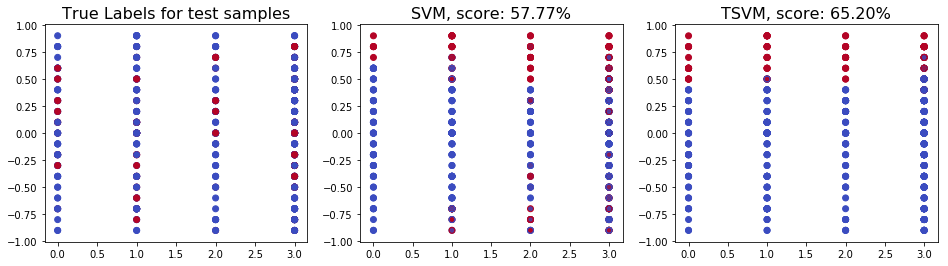

In [47]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(131)
ax.scatter(test_d[:,0],test_d[:,2],c=test_c,marker='o',cmap=plt.cm.coolwarm)
ax.set_title('True Labels for test samples',fontsize=16)
ax1 = fig.add_subplot(132)
ax1.scatter(test_d[:,0],test_d[:,2],c=test_c1,marker='o',cmap=plt.cm.coolwarm)
ax1.scatter(lu_d[:,0], lu_d[:,2], c=lu_c_0, marker='o',s=10,cmap=plt.cm.coolwarm,alpha=.6)
ax1.set_title('SVM, score: {0:.2f}%'.format(score1*100),fontsize=16)
ax2 = fig.add_subplot(133)
ax2.scatter(test_d[:,0],test_d[:,2],c=test_c2,marker='o',cmap=plt.cm.coolwarm)
ax2.scatter(lu_d[:,0], lu_d[:,2], c=lu_c, marker='o',s=10,cmap=plt.cm.coolwarm,alpha=.6)
ax2.set_title('TSVM, score: {0:.2f}%'.format(score2*100),fontsize=16)
plt.show()


## 2.Label propagation

In [165]:
# coding=utf8
"""
Graph-Based Semi-Supervised Learning (GBSSL) implementation.
"""

# Authors: Yuto Yamaguchi <yamaguchi.yuto@aist.go.jp>
# Lisence: MIT

import numpy as np
from scipy import sparse
from abc import ABCMeta, abstractmethod
from sklearn.base import BaseEstimator, ClassifierMixin

class Base(BaseEstimator, ClassifierMixin):
    __metaclass__ = ABCMeta
    def __init__(self,graph,max_iter=30):
        self.max_iter = max_iter
        self.graph = graph

    @abstractmethod
    def _build_propagation_matrix(self):
        raise NotImplementedError("Propagation matrix construction must be implemented to fit a model.")

    @abstractmethod
    def _build_base_matrix(self):
        raise NotImplementedError("Base matrix construction must be implemented to fit a model.")

    def _init_label_matrix(self):
        n_samples = self.graph.shape[0]
        n_classes = self.y_.max()+1
        return np.zeros((n_samples,n_classes))

    def _arrange_params(self):
        """Do nothing by default"""
        pass

    def fit(self,x,y):
        """Fit a graph-based semi-supervised learning model
        All the input data is provided array X (labeled samples only)
        and corresponding label array y.
        Parameters
        ----------
        x : array_like, shape = [n_labeled_samples]
            Node IDs of labeled samples
        y : array_like, shape = [n_labeled_samples]
            Label IDs of labeled samples
        Returns
        -------
        self : returns an instance of self.
        """
        self.x_ = x
        self.y_ = y

        self._arrange_params()

        self.F_ = self._init_label_matrix()

        self.P_ = self._build_propagation_matrix()
        self.B_ = self._build_base_matrix()

        remaining_iter = self.max_iter
        while remaining_iter > 0:
            self.F_ = self._propagate()
            remaining_iter -= 1

        return self

    def _propagate(self):
        return self.P_.dot(self.F_) + self.B_

    def predict(self,x):
        """Performs prediction based on the fitted model
        Parameters
        ----------
        x : array_like, shape = [n_samples]
            Node IDs
        Returns
        -------
        y : array_like, shape = [n_samples]
            Predictions for input node IDs
        """
        probas = self.predict_proba(x)
        return np.argmax(probas,axis=1)

    def predict_proba(self,x):
        """Predict probability for each possible label
        Parameters
        ----------
        x : array_like, shape = [n_samples]
            Node IDs
        Returns
        -------
        probabilities : array_like, shape = [n_samples, n_classes]
            Probability distributions across class labels
        """
        z = np.sum(self.F_[x], axis=1)
        z[z==0] += 1 # Avoid division by 0
        return (self.F_[x].T / z).T


class LGC(Base):
    """Local and Global Consistency (LGC) for GBSSL
    Parameters
    ----------
    alpha : float
      clamping factor
    max_iter : float
      maximum number of iterations allowed
    Attributes
    ----------
    x_ : array, shape = [n_samples]
        Input array of node IDs.
    References
    ----------
    Zhou, D., Bousquet, O., Lal, T. N., Weston, J., & Schölkopf, B. (2004).
    Learning with local and global consistency.
    Advances in neural information processing systems, 16(16), 321-328.
    """

    def __init__(self,graph=None,alpha=0.99,max_iter=30):
        super(LGC, self).__init__(graph,max_iter=30)
        self.alpha=alpha

    def _build_propagation_matrix(self):
        """ LGC computes the normalized Laplacian as its propagation matrix"""
        degrees = self.graph.sum(axis=0).A[0]
        degrees[degrees==0] += 1  # Avoid division by 0
        D2 = np.sqrt(sparse.diags((1.0/degrees),offsets=0))
        S = D2.dot(self.graph).dot(D2)
        return self.alpha*S

    def _build_base_matrix(self):
        n_samples = self.graph.shape[0]
        n_classes = self.y_.max()+1
        B = np.zeros((n_samples,n_classes))
        B[self.x_,self.y_] = 1
        return (1-self.alpha)*B

class HMN(Base):
    """Harmonic funcsion (HMN) for GBSSL
    Parameters
    ----------
    max_iter : float
      maximum number of iterations allowed
    Attributes
    ----------
    x_ : array, shape = [n_samples]
        Input array of node IDs.
    References
    ----------
    Zhu, X., Ghahramani, Z., & Lafferty, J. (2003, August).
    Semi-supervised learning using gaussian fields and harmonic functions.
    In ICML (Vol. 3, pp. 912-919).
    """
    def __init__(self,graph=None,max_iter=30):
        super(HMN, self).__init__(graph,max_iter=30)

    def _build_propagation_matrix(self):
        degrees = self.graph.sum(axis=0).A[0]
        degrees[degrees==0] += 1  # Avoid division by 0
        D = sparse.diags((1.0/degrees),offsets=0)
        P = D.dot(self.graph).tolil()
        P[self.x_] = 0
        return P.tocsr()

    def _build_base_matrix(self):
        n_samples = self.graph.shape[0]
        n_classes = self.y_.max()+1
        B = np.zeros((n_samples,n_classes))
        B[self.x_,self.y_] = 1
        return B

class PARW(Base):
    """Partially Absorbing Random Walk (PARW) for GBSSL
    Parameters
    ----------
    lamb: float (default=0.001)
      Absorbing parameter
    max_iter : float
      maximum number of iterations allowed
    Attributes
    ----------
    x_ : array, shape = [n_samples]
        Input array of node IDs.
    References
    ----------
    Wu, X. M., Li, Z., So, A. M., Wright, J., & Chang, S. F. (2012).
    Learning with partially absorbing random walks.
    In Advances in Neural Information Processing Systems (pp. 3077-3085).
    """
    def __init__(self,graph=None,lamb=1.0,max_iter=30):
        super(PARW, self).__init__(graph,max_iter=30)
        self.lamb=lamb

    def _build_propagation_matrix(self):
        d = self.graph.sum(axis=1).T.A[0]
        Z = sparse.diags(1.0 / (d+self.lamb), offsets=0)
        P = Z.dot(self.graph)
        return P

    def _build_base_matrix(self):
        n_samples = self.graph.shape[0]
        n_classes = self.y_.max()+1
        B = np.zeros((n_samples,n_classes))
        B[self.x_,self.y_] = 1
        d = np.array(self.graph.sum(1).T)[0]
        Z = sparse.diags(1.0 / (d+self.lamb), offsets=0)
        Lamb = sparse.diags(self.lamb,shape=(n_samples,n_samples), offsets=0)
        return Z.dot(Lamb).dot(B)

class OMNI(Base):
    """OMNI-Prop for GBSSL
    Parameters
    ----------
    lamb : float > 0 (default = 1.0)
      Define importance between prior and evidence from neighbors
    max_iter : float
      maximum number of iterations allowed
    Attributes
    ----------
    x_ : array, shape = [n_samples]
        Input array of node IDs.
    References
    ----------
    Yamaguchi, Y., Faloutsos, C., & Kitagawa, H. (2015, February).
    OMNI-Prop: Seamless Node Classification on Arbitrary Label Correlation.
    In Twenty-Ninth AAAI Conference on Artificial Intelligence.
    """

    def __init__(self,graph=None,lamb=1.0,max_iter=30):
        super(OMNI,self).__init__(graph,max_iter)
        self.lamb = lamb

    def _build_propagation_matrix(self):
        d = self.graph.sum(axis=0).A[0]
        dT = self.graph.sum(axis=1).T.A[0]
        Q = (sparse.diags(1.0/(d+self.lamb), offsets=0).dot(self.graph)).dot(sparse.diags(1.0/(dT+self.lamb),offsets=0).dot(self.graph.T)).tolil()
        Q[self.x_] = 0
        return Q

    def _build_base_matrix(self):
        n_samples = self.graph.shape[0]
        n_classes = self.y_.max()+1
        unlabeled = np.setdiff1d(np.arange(n_samples),self.x_)

        dU = self.graph[unlabeled].sum(axis=1).T.A[0]
        dT = self.graph.sum(axis=0).A[0]
        n_samples = self.graph.shape[0]
        r = sparse.diags(1.0/(dU+self.lamb),offsets=0).dot(self.lamb*self.graph[unlabeled].dot(sparse.diags(1.0/(dT+self.lamb),offsets=0)).dot(np.ones(n_samples))+self.lamb)

        b = np.ones(n_classes) / float(n_classes)

        B = np.zeros((n_samples,n_classes))
        B[unlabeled] = np.outer(r,b)
        B[self.x_,self.y_] = 1
        return B

class CAMLP(Base):
    """Confidence-Aware Modulated Label Propagation (CAMLP) for GBSSL
    Parameters
    ----------
    beta : float > 0 (default = 0.1)
      Define importance between prior and evidence from neighbors
    H : array_like, shape = [n_classes, n_classes]
      Define affinities between labels
      if None, identity matrix is set
    max_iter : float
      maximum number of iterations allowed
    Attributes
    ----------
    x_ : array, shape = [n_samples]
        Input array of node IDs.
    References
    ----------
    Yamaguchi, Y., Faloutsos, C., & Kitagawa, H. (2016, May).
    CAMLP: Confidence-Aware Modulated Label Propagation.
    In SIAM International Conference on Data Mining.
    """

    def __init__(self,graph=None,beta=0.1,H=None,max_iter=30):
        super(CAMLP,self).__init__(graph,max_iter)
        self.beta=beta
        self.H=H

    def _arrange_params(self):
        if self.H is None:
            n_classes = self.y_.max()+1
            self.H = np.identity(n_classes)
        self.Z = self._build_normalization_term()

    def _propagate(self):
        return self.P_.dot(self.F_).dot(self.H) + self.B_

    def _build_normalization_term(self):
        d = self.graph.sum(axis=1).T.A[0]
        return sparse.diags(1.0/(1.0+d*self.beta),offsets=0)

    def _build_propagation_matrix(self):
        return self.Z.dot(self.beta*self.graph)

    def _build_base_matrix(self):
        n_samples = self.graph.shape[0]
        n_classes = self.y_.max()+1
        B = np.ones((n_samples,n_classes))/float(n_classes)
        B[self.x_] = 0
        B[self.x_,self.y_] = 1
        return self.Z.dot(B)